In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hist(array,bin_num,default=True):
    n, bins, patches = plt.hist(array,bins=bin_num,normed=default)
    plt.close()
    return bins, n

def colour_plot_hist(array,label,bin_num=1000,default=False):
    array = [row[0]-row[1] for row in array]
    n, bins = np.histogram(array,bins=bin_num,normed=default)
    plt.plot(bins[1:],n,label=label)
    return 

def petro_plot_hist(array,label,bin_num=1000,default=False):
    array = [row[1] for row in array]
    n, bins = np.histogram(array,bins=bin_num,normed=default)
    plt.plot(bins[1:],n,label=label)
    return 

def surface_brightness_plot_hist(array,label,bin_num=800,default=False):
    array = [row[1]+2.5*np.log10(2*np.pi*row[4]*row[4]) for row in array]
    n, bins = np.histogram(array,bins=bin_num,normed=default)
    plt.plot(bins[1:],n,label=label)
    return 


# this notebook is looking at how the final selection compares to the MGS in each band pass
# each array has the exact same rows: 0 u, 1 r, 2 mr_petro, 3 z, 4 petroR50_r

In [3]:
mgs = np.load('/home/calum/Documents/Mphys_data/cat_check/all_mgs_colours.npy')
galex = np.load('/home/calum/Documents/Mphys_data/cat_check/all_galex_colours.npy')
wise = np.load('/home/calum/Documents/Mphys_data/cat_check/all_wise_colours.npy')
ukidss = np.load('/home/calum/Documents/Mphys_data/cat_check/all_ukidss_colours.npy')
mw = np.load('/home/calum/Documents/Mphys_data/cat_check/all_mw_colours.npy')

len(mgs), len(wise), len(galex), len(ukidss), len(mw)

(580316, 180639, 135232, 201406, 115684)

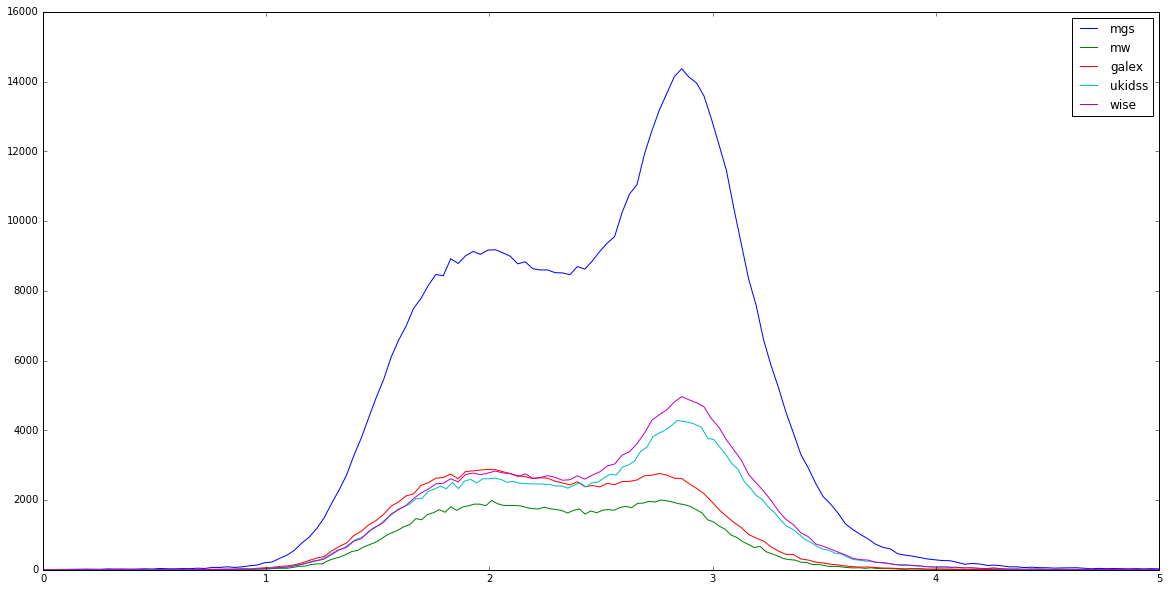

In [4]:
plt.figure(figsize=(20,10))
colour_plot_hist(mgs,'mgs')
colour_plot_hist(mw,'mw')
colour_plot_hist(galex,'galex')
colour_plot_hist(ukidss,'ukidss')
colour_plot_hist(wise,'wise')
plt.xlim(0,5)
plt.legend()

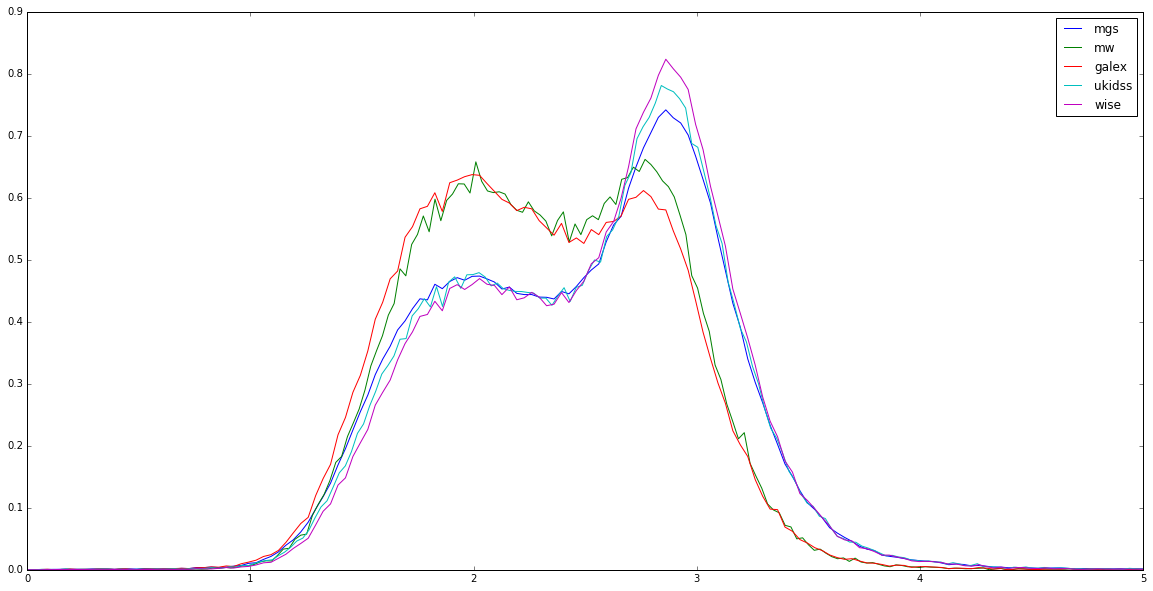

In [5]:
plt.figure(figsize=(20,10))
colour_plot_hist(mgs,'mgs',default=True)
colour_plot_hist(mw,'mw',default=True)
colour_plot_hist(galex,'galex',default=True)
colour_plot_hist(ukidss,'ukidss',default=True)
colour_plot_hist(wise,'wise',default=True)
plt.xlim(0,5)
plt.legend()

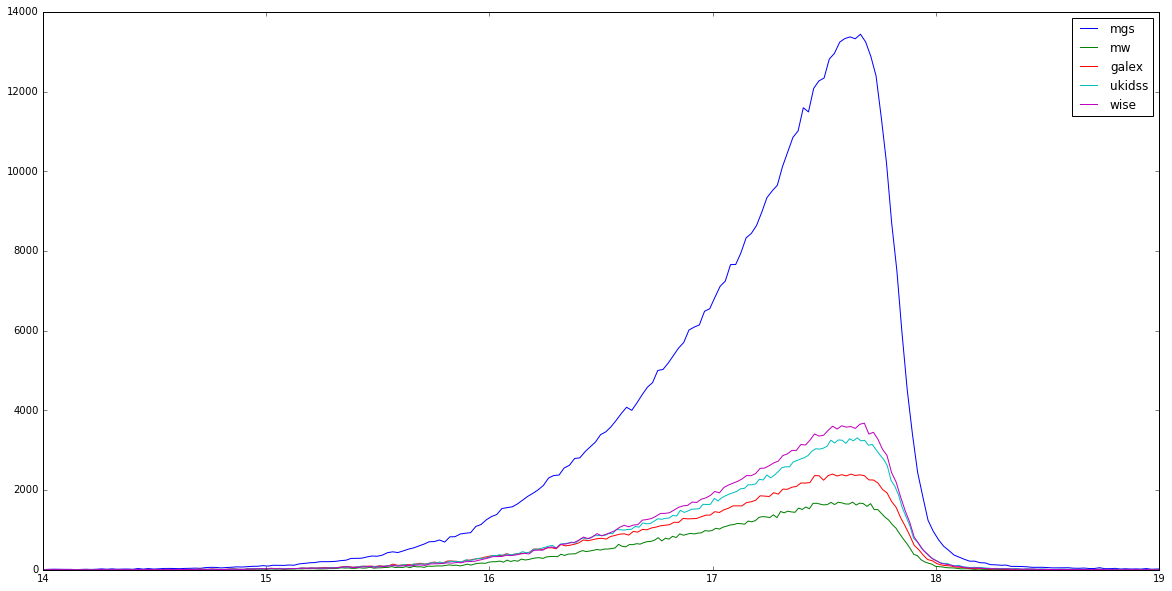

In [9]:
plt.figure(figsize=(20,10))
petro_plot_hist(mgs,'mgs')
petro_plot_hist(mw,'mw')
petro_plot_hist(galex,'galex')
petro_plot_hist(ukidss,'ukidss')
petro_plot_hist(wise,'wise')
plt.xlim(14,19)
plt.legend()

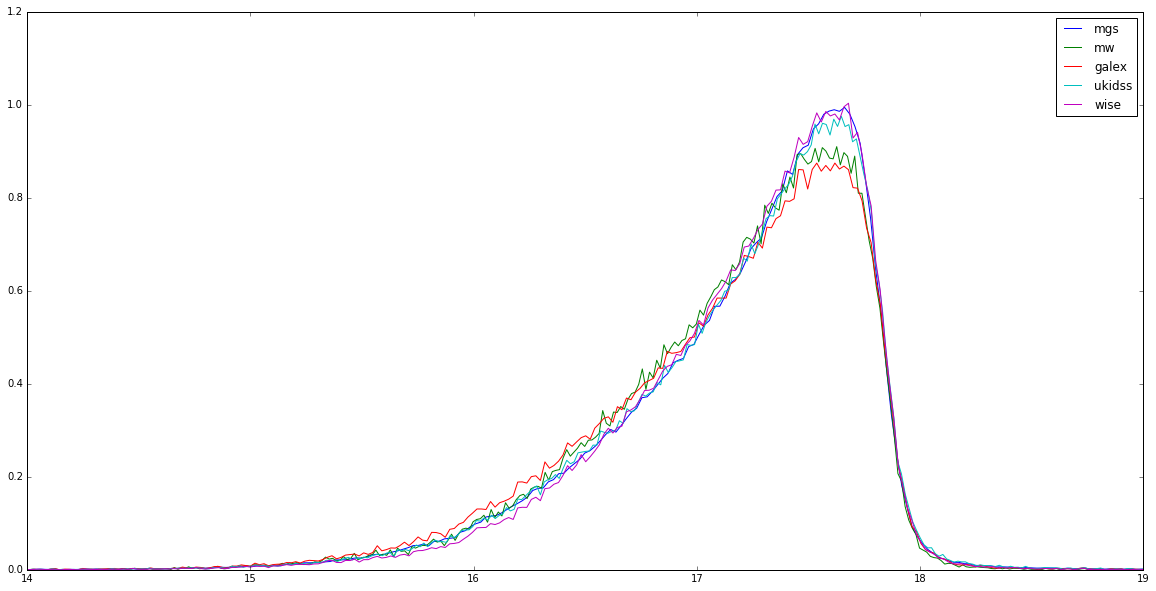

In [8]:
plt.figure(figsize=(20,10))
petro_plot_hist(mgs,'mgs',default=True)
petro_plot_hist(mw,'mw',default=True)
petro_plot_hist(galex,'galex',default=True)
petro_plot_hist(ukidss,'ukidss',default=True)
petro_plot_hist(wise,'wise',default=True)
plt.xlim(14,19)
plt.legend()

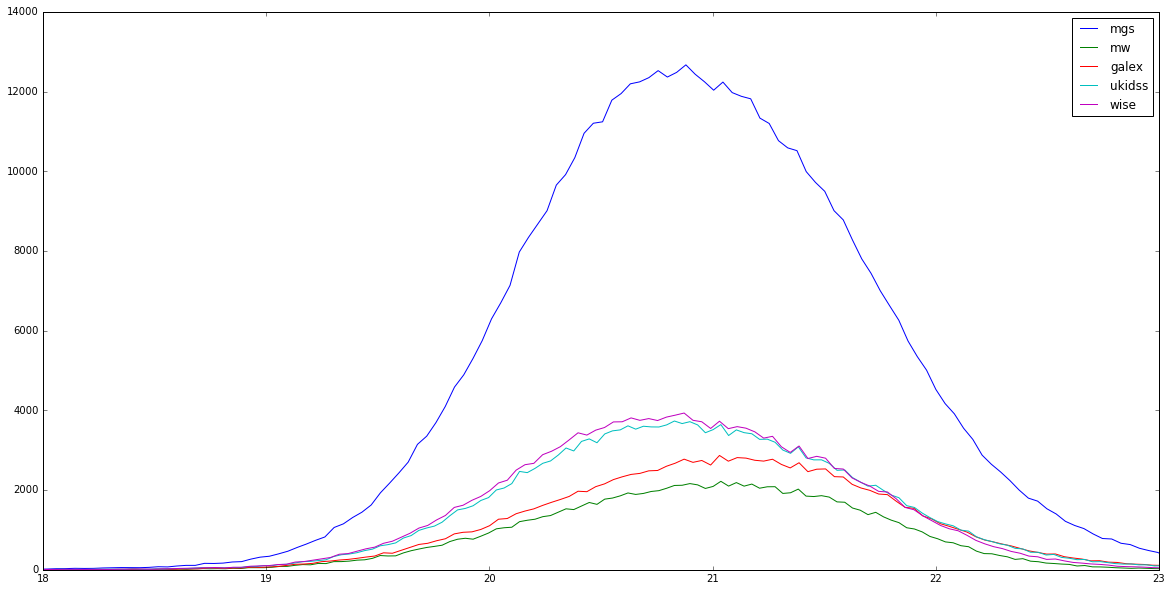

In [17]:
plt.figure(figsize=(20,10))
surface_brightness_plot_hist(mgs,'mgs')
surface_brightness_plot_hist(mw,'mw')
surface_brightness_plot_hist(galex,'galex')
surface_brightness_plot_hist(ukidss,'ukidss')
surface_brightness_plot_hist(wise,'wise')
plt.xlim(18,23)
plt.legend()

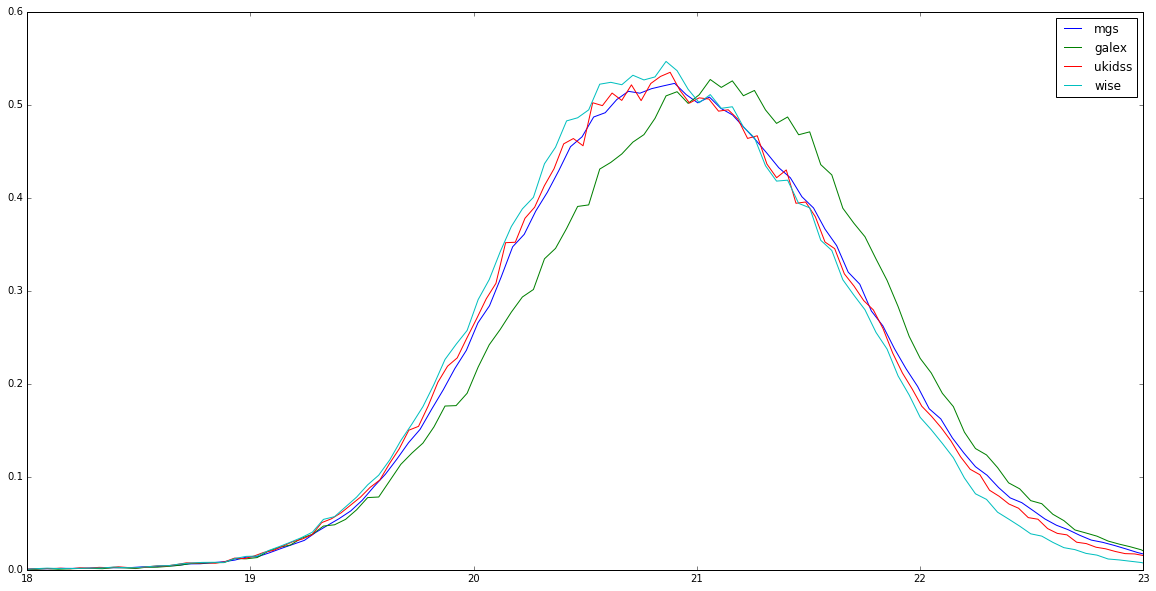

In [20]:
plt.figure(figsize=(20,10))
surface_brightness_plot_hist(mgs,'mgs',default=True)
#surface_brightness_plot_hist(mw,'mw',default=True)
surface_brightness_plot_hist(galex,'galex',default=True)
surface_brightness_plot_hist(ukidss,'ukidss',default=True)
surface_brightness_plot_hist(wise,'wise',default=True)
plt.xlim(18,23)
plt.legend()

In [21]:
mgs_z = [row[3] for row in mgs]
mw_z = [row[3] for row in mw]
wise_z = [row[3] for row in wise]
galex_z = [row[3] for row in galex]
ukidss_z = [row[3] for row in ukidss]
np.median(mgs_z), np.median(mw_z), np.median(wise_z), np.median(galex_z), np.median(ukidss_z)

(0.10252184420824051,
 0.096321634948253632,
 0.10303033143281937,
 0.092281367629766464,
 0.10037333518266678)

In [22]:
np.min(mgs_z), np.min(mw_z), np.min(wise_z), np.min(galex_z), np.min(ukidss_z)

(4.0696040315424398e-08,
 1.3892521337766084e-06,
 4.0696040315424398e-08,
 9.7589577308099251e-07,
 4.0696040315424398e-08)

In [23]:
np.max(mgs_z), np.max(mw_z), np.max(wise_z), np.max(galex_z), np.max(ukidss_z)

(7.0038695335388184,
 6.5296602249145508,
 6.5296602249145508,
 6.5296602249145508,
 6.5296602249145508)